# **Problem Research**

- **Masalah**: Menganalisis kinerja kredit nasabah berdasarkan data pada tabel "bureau" dan "bureau_balance" untuk mengidentifikasi pola-pola yang dapat membantu dalam pengambilan keputusan terkait penilaian kredit.
- **Tujuan**: Meningkatkan akurasi penilaian kredit, mengurangi risiko kredit macet, dan meningkatkan profitabilitas perusahaan.

**Import Librar**y

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

**Load Data**

In [ ]:
# Memuat data dari file CSV
bureau = pd.read_csv('/content/sample_data/bureau.csv')
bureau_balance = pd.read_csv('/content/sample_data/bureau_balance.csv')

In [ ]:
bureau.info()
bureau_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63750 entries, 0 to 63749
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   SK_ID_CURR              63750 non-null  int64  
 1   SK_ID_BUREAU            63750 non-null  int64  
 2   CREDIT_ACTIVE           63750 non-null  object 
 3   CREDIT_CURRENCY         63750 non-null  object 
 4   DAYS_CREDIT             63750 non-null  int64  
 5   CREDIT_DAY_OVERDUE      63750 non-null  int64  
 6   DAYS_CREDIT_ENDDATE     59755 non-null  float64
 7   DAYS_ENDDATE_FACT       39419 non-null  float64
 8   AMT_CREDIT_MAX_OVERDUE  22346 non-null  float64
 9   CNT_CREDIT_PROLONG      63750 non-null  int64  
 10  AMT_CREDIT_SUM          63749 non-null  float64
 11  AMT_CREDIT_SUM_DEBT     53961 non-null  float64
 12  AMT_CREDIT_SUM_LIMIT    41635 non-null  float64
 13  AMT_CREDIT_SUM_OVERDUE  63749 non-null  float64
 14  CREDIT_TYPE             63749 non-null

In [ ]:
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131.0,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20.0,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16.0,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16.0,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21.0,NaN


In [ ]:
bureau_balance.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0.0,C
1,5715448,-1.0,C
2,5715448,-2.0,C
3,5715448,-3.0,C
4,5715448,-4.0,C


# **Data Pre-Processing**

**Cek Missing Value**

In [ ]:
bureau.isna().sum()

SK_ID_CURR                    0
SK_ID_BUREAU                  0
CREDIT_ACTIVE                 0
CREDIT_CURRENCY               0
DAYS_CREDIT                   0
CREDIT_DAY_OVERDUE            0
DAYS_CREDIT_ENDDATE        3995
DAYS_ENDDATE_FACT         24331
AMT_CREDIT_MAX_OVERDUE    41404
CNT_CREDIT_PROLONG            0
AMT_CREDIT_SUM                1
AMT_CREDIT_SUM_DEBT        9789
AMT_CREDIT_SUM_LIMIT      22115
AMT_CREDIT_SUM_OVERDUE        1
CREDIT_TYPE                   1
DAYS_CREDIT_UPDATE            1
AMT_ANNUITY               49356
dtype: int64

In [ ]:
bureau_balance.isna().sum()

SK_ID_BUREAU      0
MONTHS_BALANCE    1
STATUS            1
dtype: int64

**Handle Missing Value**

In [ ]:
# Handling Missing Values
bureau.fillna(0, inplace=True)
bureau_balance.fillna(0, inplace=True)

In [ ]:
bureau.info()
bureau_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63750 entries, 0 to 63749
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   SK_ID_CURR              63750 non-null  int64  
 1   SK_ID_BUREAU            63750 non-null  int64  
 2   CREDIT_ACTIVE           63750 non-null  object 
 3   CREDIT_CURRENCY         63750 non-null  object 
 4   DAYS_CREDIT             63750 non-null  int64  
 5   CREDIT_DAY_OVERDUE      63750 non-null  int64  
 6   DAYS_CREDIT_ENDDATE     63750 non-null  float64
 7   DAYS_ENDDATE_FACT       63750 non-null  float64
 8   AMT_CREDIT_MAX_OVERDUE  63750 non-null  float64
 9   CNT_CREDIT_PROLONG      63750 non-null  int64  
 10  AMT_CREDIT_SUM          63750 non-null  float64
 11  AMT_CREDIT_SUM_DEBT     63750 non-null  float64
 12  AMT_CREDIT_SUM_LIMIT    63750 non-null  float64
 13  AMT_CREDIT_SUM_OVERDUE  63750 non-null  float64
 14  CREDIT_TYPE             63750 non-null

**Cek Data Duplikat**

In [ ]:
bureau.duplicated().sum()

0

In [ ]:
bureau_balance.duplicated().sum()

0

**Gabungkan Data**

In [ ]:
# Merge bureau and bureau_balance data on SK_ID_BUREAU
merged_data = pd.merge(bureau, bureau_balance, on='SK_ID_BUREAU', how='left')
merged_data.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,MONTHS_BALANCE,STATUS
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,0.0,0,91323.0,0.0,0.0,0.0,Consumer credit,-131.0,0.0,NaN,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,0.0,0.0,0,225000.0,171342.0,0.0,0.0,Credit card,-20.0,0.0,NaN,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,0.0,0.0,0,464323.5,0.0,0.0,0.0,Consumer credit,-16.0,0.0,NaN,NaN
3,215354,5714465,Active,currency 1,-203,0,0.0,0.0,0.0,0,90000.0,0.0,0.0,0.0,Credit card,-16.0,0.0,NaN,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,0.0,77674.5,0,2700000.0,0.0,0.0,0.0,Consumer credit,-21.0,0.0,NaN,NaN


# **Data Visualization and Business Insight**

**Data Visualitation**

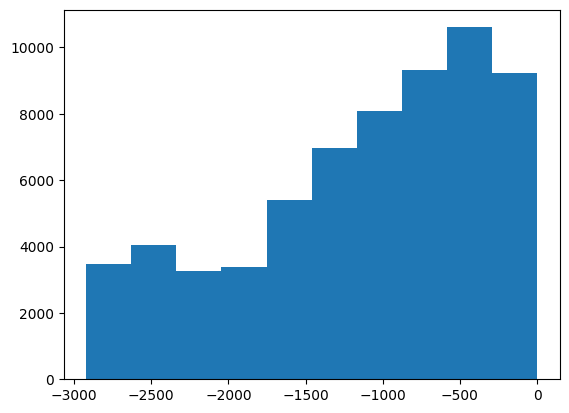

In [ ]:
plt.hist(bureau['DAYS_CREDIT'])
plt.show()

**Insight**:
Permohonan kredit terbanyak ada pada kisaran 500 hari sebelum data direkam.

# **Machine Learning Implementation and Evaluation**

**Menggunakan regresi logistik untuk memprediksi CREDIT_ACTIVE**

In [ ]:
X = bureau[['DAYS_CREDIT', 'AMT_CREDIT_SUM']]
y = bureau['CREDIT_ACTIVE']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Model

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

**Evaluasi performa model**

In [ ]:
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:', confusion_matrix(y_test, y_pred))
print('Classification Report:', classification_report(y_test, y_pred))

Accuracy: 0.7027450980392157
Confusion Matrix: [[1426    0 3398    0]
 [   0    0    1    0]
 [ 342    0 7534    0]
 [  11    0   38    0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:               precision    recall  f1-score   support

      Active       0.80      0.30      0.43      4824
    Bad debt       0.00      0.00      0.00         1
      Closed       0.69      0.96      0.80      7876
        Sold       0.00      0.00      0.00        49

    accuracy                           0.70     12750
   macro avg       0.37      0.31      0.31     12750
weighted avg       0.73      0.70      0.66     12750



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Insight**

Dari hasil model yang diberikan, terdapat beberapa insight yang dapat diambil, antara lain:
Akurasi model sebesar 70.27%, yang menunjukkan bahwa model tersebut cukup baik dalam memprediksi kategori-kategori yang ada.

Namun, terdapat beberapa kategori yang sulit diprediksi, seperti "Bad debt" dan "Sold", yang memiliki nilai precision dan recall sebesar 0. Hal ini menunjukkan bahwa model perlu diperbaiki untuk dapat memprediksi kategori-kategori ini dengan lebih baik.

# **Business Recommendations**

Berdasarkan insight-insight yang ditemukan dari analisis data, beberapa rekomendasi bisnis yang dapat diberikan adalah:
1. Perlu dilakukan evaluasi ulang terhadap kebijakan penilaian kredit yang digunakan. Hal ini dapat meliputi peninjauan kembali terhadap faktor-faktor yang digunakan dalam penilaian kredit, serta penyesuaian terhadap model penilaian kredit yang digunakan.
2. Perlu dilakukan penelitian lebih lanjut untuk mengetahui penyebab dari kategori-kategori yang sulit diprediksi. Hal ini dapat meliputi peninjauan kembali terhadap data yang digunakan, serta penyesuaian terhadap fitur-fitur yang digunakan dalam model penilaian kredit.
3. Perlu dilakukan monitoring secara berkala terhadap model penilaian kredit yang digunakan. Hal ini dapat meliputi pemantauan terhadap performa model penilaian kredit, serta peninjauan kembali terhadap model penilaian kredit yang digunakan.